### Import environment Variables ###

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
try:
   import cPickle as pickle
except:
   import pickle

%matplotlib inline 

### Set working Directory ###

In [2]:
working_dir = '/home/dolu/Projects/CDCMortality/data/'
results_dir = '/home/dolu/Projects/CDCMortality/results/'

In [3]:
cd '/home/dolu/Projects/CDCMortality/data/'

/home/dolu/Projects/CDCMortality/data


### Import Data ###

In [5]:
filename = 'mortalitydata.csv'
data_all = pd.read_csv(filename, sep= ',')

In [6]:
data_all = data_all.drop('Unnamed: 0', axis=1)

In [ ]:
data_all.shape

In [7]:
data_all.head()

,Education,Sex,Age,CurrentDataYear,MannerofDeath,UCD_ICD10,UC113,UC358,EntityAxisNumof,EntityAxisConditions,RecordAxisNumof,RecordAxisConditions,Race,Education_ctg,Age_ctg,Race_ctg,UC113_ICD10,UC358_ICD10
0,0,M,38,1999,7,R570,110,380,1,11R570 ...,1,R570 ...,1,No formal education,35-44,White,"Symptoms, signs and abnormal clinical and labo...","All other symptoms, signs and abnormal clinica..."
1,6,M,86,1999,7,N19,100,327,1,11N19 ...,1,N19 ...,1,elementary school,85-120,White,Renal failure (N17-N19),Renal failure (N17-N19)
2,7,M,82,1999,7,I219,59,211,2,11I219 61R568 ...,2,I219 R568 ...,1,elementary school,75-84,White,Acute myocardial infarction (I21-I22),Acute myocardial infarction (I21-I22)
3,14,F,53,1999,,I420,68,227,2,11I500 21I420 ...,2,I420 I500 ...,2,college,45-54,Black,"All other forms of heart disease (I26-I28,I34-...",Cardiomyopathy (I42)
4,6,M,75,1999,7,C229,24,85,1,11C229 ...,1,C229 ...,1,elementary school,75-84,White,Malignant neoplasms of liver and intrahepatic ...,"Liver (C22.0,C22.2-C22.9)"


### Import entity and record axis codes

In [8]:
recordaxis = pd.read_csv('/home/dolu/Projects/CDCMortality/data/recordaxis.csv', sep= ',')
entityaxis = pd.read_csv('/home/dolu/Projects/CDCMortality/data/entityaxis.csv', sep= ',')

/usr/local/lib/python2.7/dist-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (12,14,15,16,17,18,19) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/usr/local/lib/python2.7/dist-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (14,15,16,17,18,19,20) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [9]:
entityaxis.shape

(42243046, 21)

In [10]:
entityaxis = entityaxis.drop('Unnamed: 0', axis=1)
entityaxis.tail(5)

,condition1,condition2,condition3,condition4,condition5,condition6,condition7,condition8,condition9,condition10,condition11,condition12,condition13,condition14,condition15,condition16,condition17,condition18,condition19,condition20
42243041,11P072,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
42243042,11R092,21I251,61F179,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
42243043,11F102,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
42243044,11R263,21I119,22I679,23I250,24I672,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
42243045,11I119,21I10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
entityaxis = entityaxis.fillna(' ')
entityaxis.tail()

,condition1,condition2,condition3,condition4,condition5,condition6,condition7,condition8,condition9,condition10,condition11,condition12,condition13,condition14,condition15,condition16,condition17,condition18,condition19,condition20
42243041,11P072,,,,,,,,,,,,,,,,,,,
42243042,11R092,21I251,61F179,,,,,,,,,,,,,,,,,
42243043,11F102,,,,,,,,,,,,,,,,,,,
42243044,11R263,21I119,22I679,23I250,24I672,,,,,,,,,,,,,,,
42243045,11I119,21I10,,,,,,,,,,,,,,,,,,


In [12]:
recordaxis = recordaxis.drop('Unnamed: 0', axis=1)
recordaxis.tail()

,condition1,condition2,condition3,condition4,condition5,condition6,condition7,condition8,condition9,condition10,condition11,condition12,condition13,condition14,condition15,condition16,condition17,condition18,condition19
42243041,P072,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
42243042,I251,F179,R092,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
42243043,F102,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
42243044,I250,I119,I672,R263,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
42243045,I119,I10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
recordaxis = recordaxis.fillna(' ')
recordaxis.tail()

,condition1,condition2,condition3,condition4,condition5,condition6,condition7,condition8,condition9,condition10,condition11,condition12,condition13,condition14,condition15,condition16,condition17,condition18,condition19
42243041,P072,,,,,,,,,,,,,,,,,,
42243042,I251,F179,R092,,,,,,,,,,,,,,,,
42243043,F102,,,,,,,,,,,,,,,,,,
42243044,I250,I119,I672,R263,,,,,,,,,,,,,,,
42243045,I119,I10,,,,,,,,,,,,,,,,,


### Group UCD based on 358 Recodes

In [14]:
# IX.Diseases of the circulatory system (I00-I99) between 197 & 246
UCD_Circulatory = data_all[ (data_all['UC358'] >= 197) & (data_all['UC358'] < 247)]

# X. Diseases of the respiratory system (J00-J98) between 247 & 278
UCD_Respiratory = data_all[(data_all['UC358'] >= 247) & (data_all['UC358'] < 279)]

# V.Mental and behavioral disorders (F01-F99) between 174 and 184
UCD_Mental = data_all[(data_all['UC358'] >= 174) & (data_all['UC358'] < 185)]

# XX.External causes of mortality (*U01-*U03,V01-Y89) between 381 and 456
UCD_External = data_all[(data_all['UC358'] >= 381) & (data_all['UC358'] < 457)]


### Number of observations in each subcategory

In [ ]:
UCD_Mental['Age_ctg'].groupby([UCD_Mental['UC358_ICD10'], UCD_Mental['UC358'],  UCD_Mental['CurrentDataYear']]).size().nlargest(5)

In [ ]:
UCD_Mental['Age_ctg'].groupby([UCD_Mental['UC358_ICD10'], UCD_Mental['UC358'],  UCD_Mental['CurrentDataYear']]).size()

In [ ]:
UCD_Mental['Age_ctg'].groupby([UCD_Mental['UC113_ICD10'], UCD_Mental['UC113']]).size().nlargest(10)

In [ ]:
UCD_External['Age_ctg'].groupby([UCD_External['UC358_ICD10'], UCD_External['UC358']]).size().nlargest(10)

In [ ]:
UCD_External['Age_ctg'].groupby([UCD_External['UC113_ICD10'], UCD_External['UC113']]).size().nlargest(10)

### UCD Top 10

In [64]:
UCD_top10 = data_all['UCD_ICD10'].groupby([data_all['UCD_ICD10'], data_all['UC358_ICD10']]).count().nlargest(10)

In [66]:
UCD_top10

UCD_ICD10  UC358_ICD10                                                        
I251       All other forms of chronic ischemic heart disease (I20,I25.1-I25.9)    3239647
C349       Of trachea, bronchus and lung (C33-C34)                                2654695
I219       Acute myocardial infarction (I21-I22)                                  2472068
J449       Other chronic obstructive pulmonary disease (J44)                      1722914
F03        Organic dementia (F01,F03)                                             1281062
I64        Stroke, not specified as hemorrhage or infarction (I64)                1271710
G309       Alzheimer’s disease (G30)                                              1219729
I250       Atherosclerotic cardiovascular disease, so described (I25.0)           1067770
I500       Congestive heart failure (I50.0)                                        922298
J189       Pneumonia due to other or unspecified organisms (J16,J18)               837660
Name: UCD_ICD10, dtyp

In [65]:
UCD_top10.to_csv(results_dir + 'ucd_top10.csv ')

### Find the UCD of interest based on matching strings of entity axis, record axis, and majorcause_ICD10

#### F179 as an underlying cause of death 

In [30]:
 UCD_Mental[UCD_Mental['UCD_ICD10'] == 'F179'].groupby([UCD_Mental['UC358_ICD10'], UCD_Mental['UC358'],  UCD_Mental['CurrentDataYear']]).size().nlargest(5)

UC358_ICD10                                                                        UC358  CurrentDataYear
Mental and behavioral disorders due to other psychoactive substance use (F11-F19)  179    2006               1200
                                                                                          2005               1098
                                                                                          2004                828
                                                                                          2003                618
                                                                                          2009                463
dtype: int64

In [32]:
F179_UCD =  UCD_Mental[UCD_Mental['UCD_ICD10'] == 'F179'].groupby([UCD_Mental['UC358_ICD10'], UCD_Mental['UC358'],  UCD_Mental['CurrentDataYear']]).size().sum()
F179_UCD

8568

#### F179 mentioned as a single cause of death 

In [33]:
UCD_Mental[(UCD_Mental['RecordAxisNumof'] == 1) & (UCD_Mental['UCD_ICD10'] == 'F179')].groupby([UCD_Mental['CurrentDataYear']]).size().nlargest(10)

CurrentDataYear
2009    392
2013    384
2015    320
2012    307
2008    302
2014    291
2007    281
2010    250
2011    239
2006    211
dtype: int64

In [34]:
F179_SingleCause = UCD_Mental[(UCD_Mental['RecordAxisNumof'] == 1) & (UCD_Mental['UCD_ICD10'] == 'F179')].groupby([UCD_Mental['CurrentDataYear']]).size().sum()
F179_SingleCause

3441

#### F179 mentioned as cause of death, grouped by number of causes

In [38]:
UCD_Mental[(UCD_Mental['RecordAxisNumof'] > 1) & (UCD_Mental['UCD_ICD10'] == 'F179')].groupby([UCD_Mental['RecordAxisNumof'],UCD_Mental['CurrentDataYear']]).size().nlargest(10)

RecordAxisNumof  CurrentDataYear
2                2006               507
                 2005               452
                 2004               280
3                2006               219
                 2005               204
2                2003               203
3                2004               173
                 2003               147
4                2006               128
3                2000               114
dtype: int64

In [39]:
F179_Morethantwo = UCD_Mental[(UCD_Mental['RecordAxisNumof'] > 1) & (UCD_Mental['UCD_ICD10'] == 'F179')].groupby([UCD_Mental['RecordAxisNumof'],UCD_Mental['CurrentDataYear']]).size().sum()
F179_Morethantwo

5127

#### F179 as a cause of death, any mention

In [15]:
F179_UCD_Mental_Anymention = UCD_Mental.RecordAxisConditions.str.contains(r'F179').sum()
F179_UCD_Mental_Anymention

44179

In [16]:
F179_data_all_Anymention = data_all.RecordAxisConditions.str.contains(r'F179').sum()
F179_data_all_Anymention

2773901

### Plot stacked bar chart comparing UCD for nicotine Dependence (F179)

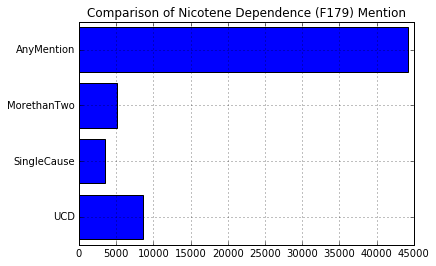

In [51]:
f = plt.figure()

val = [F179_UCD,F179_SingleCause,F179_Morethantwo,F179_UCD_Mental_Anymention]    # the bar lengths
pos = arange(4)+.5    # the bar centers on the y axis

plt.title('Comparison of Nicotene Dependence (F179) Mention', color='black')
plt.barh(pos, val, align ='center' )
plt.yticks(pos, ('UCD', 'SingleCause', 'MorethanTwo', 'AnyMention'))
plt.legend(loc='upper right', bbox_to_anchor=(1, 1))

grid(True)

plt.show()
plt.savefig(results_dir + 'Comparison of Nicotene Dependence_F179.pdf',loc=0, bbox_inches='tight')


#### Opioid F11 as an underlying cause of death 

In [53]:
 data_all[data_all['UCD_ICD10'] == 'F11'].groupby([data_all['UC358_ICD10'], data_all['UC358'],  data_all['CurrentDataYear']]).size().nlargest(5)

Series([], dtype: int64)

In [ ]:
F179_UCD =  UCD_Mental[UCD_Mental['UCD_ICD10'] == 'F179'].groupby([UCD_Mental['UC358_ICD10'], UCD_Mental['UC358'],  UCD_Mental['CurrentDataYear']]).size().sum()
F179_UCD

#### F179 mentioned as a single cause of death 

In [ ]:
UCD_Mental[(UCD_Mental['RecordAxisNumof'] == 1) & (UCD_Mental['UCD_ICD10'] == 'F179')].groupby([UCD_Mental['CurrentDataYear']]).size().nlargest(10)

In [ ]:
F179_Morethantwo = UCD_Mental[(UCD_Mental['RecordAxisNumof'] > 1) & (UCD_Mental['UCD_ICD10'] == 'F179')].groupby([UCD_Mental['RecordAxisNumof'],UCD_Mental['CurrentDataYear']]).size().sum()
F179_Morethantwo

#### F179 as a cause of death, any mention

In [ ]:
F179_UCD_Mental_Anymention = UCD_Mental.RecordAxisConditions.str.contains(r'F179').sum()
F179_UCD_Mental_Anymention

In [ ]:
F179_data_all_Anymention = data_all.RecordAxisConditions.str.contains(r'F179').sum()
F179_data_all_Anymention

### Plot stacked bar chart comparing UCD for nicotine Dependence (F179)

In [ ]:
f = plt.figure()

val = [F179_UCD,F179_SingleCause,F179_Morethantwo,F179_UCD_Mental_Anymention]    # the bar lengths
pos = arange(4)+.5    # the bar centers on the y axis

plt.title('Comparison of Nicotene Dependence (F179) Mention', color='black')
plt.barh(pos, val, align ='center' )
plt.yticks(pos, ('UCD', 'SingleCause', 'MorethanTwo', 'AnyMention'))
plt.legend(loc='upper right', bbox_to_anchor=(1, 1))

grid(True)

plt.show()
plt.savefig(results_dir + 'Comparison of Nicotene Dependence_F179.pdf',loc=0, bbox_inches='tight')


### Group UCD by year

In [ ]:
# Create a groupby variable that groups UCD by CurrentDataYear
ucdgroupby_year = data_all['UCD_ICD10'].groupby(data_all['CurrentDataYear']).describe().unstack()

In [ ]:
ucdgroupby_year.head()

In [ ]:
ucdgroupby_year.to_csv(results_dir +'ucdgroupby_year.csv ')

In [ ]:
# Create a groupby variable that groups UCD by Age_ctg
ucdgroupby_year_ctg = data_all.groupby(['CurrentDataYear', 'UCD_ICD10']).size()

In [ ]:
ucdgroupby_year_sort = ucdgroupby_year_ctg.sort_index(ascending=False, inplace=False)
ucdgroupby_year_sort

In [ ]:
ucdgroupby_year_sort.to_csv(results_dir + 'ucdgroupby_year_sort.csv ')

### Group UCD by age

In [ ]:
# Create a groupby variable that groups UCD by CurrentDataYear
ucdgroupby_age = data_all['UCD_ICD10'].groupby(data_all['Age_ctg']).describe().unstack()

In [ ]:
ucdgroupby_age

In [ ]:
ucdgroupby_age.to_csv(results_dir + 'ucdgroupby_age.csv ')

In [ ]:
# Create a groupby variable that groups UCD by Age_ctg
ucdgroupby_agectg = data_all.groupby(['Age_ctg', 'UCD_ICD10']).size()


In [ ]:
ucdgroupby_agectg_sort = ucdgroupby_agectg.sort_index(ascending=False, inplace=False)
ucdgroupby_agectg_sort

In [ ]:
ucdgroupby_agectg_sort.to_csv(results_dir + 'ucdgroupby_agectg_sort.csv ')

### Group UCD by  gender

In [ ]:
# Create a groupby variable that groups UCD by CurrentDataYear
ucdgroupby_gender = data_all['UCD_ICD10'].groupby(data_all['Sex']).describe().unstack()

In [ ]:
ucdgroupby_gender.head()

In [ ]:
ucdgroupby_gender.to_csv(results_dir + 'ucdgroupby_gender.csv ')

In [ ]:
# Create a groupby variable that groups UCD by Age_ctg
ucdgroupby_gender_ctg = data_all.groupby(['Sex', 'UCD_ICD10']).size()


In [ ]:
ucdgroupby_gender_sort = ucdgroupby_gender_ctg.sort_index(ascending=True, inplace=False)
ucdgroupby_gender_sort

In [ ]:
ucdgroupby_gender_sort.to_csv(results_dir + 'ucdgroupby_gender_sort.csv ')

### Group UCD by  race


In [ ]:
# Create a groupby variable that groups UCD by CurrentDataYear
ucdgroupby_race = data_all['UCD_ICD10'].groupby(data_all['Race_ctg']).describe().unstack()

In [ ]:
ucdgroupby_race.head()

In [ ]:
ucdgroupby_race.to_csv(results_dir + 'ucdgroupby_race.csv ')

Top 10  UCD by year, age, gender, race

For race use     Non-Hispanic: white
·         Non-Hispanic: black
·         Hispanic
·         All-race- All-origins

Explain the sudden drop for infacts in 2003

In [ ]:
out

In [ ]:
# Create a list to store the data
grades = []

# For each row in the column,
for row in entityaxis['condition1']:
    # if more than a value,
    if row > 95:
        # Append a letter grade
        grades.append('A')
    # else, if more than a value,
    elif row > 90:
        # Append a letter grade
        grades.append('A-')
    # else, if more than a value,
    elif row > 85:
        # Append a letter grade
        grades.append('B')
    # else, if more than a value,
    elif row > 80:
        # Append a letter grade
        grades.append('B-')
    # else, if more than a value,
    elif row > 75:
        # Append a letter grade
        grades.append('C')
    # else, if more than a value,
    elif row > 70:
        # Append a letter grade
        grades.append('C-')
    # else, if more than a value,
    elif row > 65:
        # Append a letter grade
        grades.append('D')
    # else, if more than a value,
    elif row > 60:
        # Append a letter grade
        grades.append('D-')
    # otherwise,
    else:
        # Append a failing grade
        grades.append('Failed')

# Create a column from the list
df['grades'] = grades

In [ ]:
test =  entityaxis.iloc[3].loc[entityaxis.iloc[3] != '']

In [ ]:
test[-1]

In [ ]:
year_recordaxis_3.condition3.loc[year_recordaxis_3.condition4 != ''] = year_recordaxis_3.condition4.loc[year_recordaxis_3.condition4 != '']


In [ ]:
list(entityaxis.iloc[0][1])

In [ ]:
MajorCause_value = 0.5 + np.arange(0, 136)
MajorCause_groups = UCD2[['Cause Title']]

In [ ]:
UCD2.head()

In [ ]:
majorcause = pd.cut(data_all['MajorCause'], MajorCause_value, labels=MajorCause_groups)

In [ ]:
for majorcause.iloc[0]

### Calculate Descriptive Statistics ###

In [ ]:
n_age_groups = data_all.Age_ctg.unique().size
age_groups = ['<1','1-4', '5-14', '15-24', '25-34', '35-44', '45-54', '55-64'
             , '65-74', '75-84', '85-120']
age_value = [-1,1,4,14,24,34,44,54,64,74,84,120]

In [ ]:
for i in range(n_age_groups-1):
    dt = data_all[['RecordAxisNumof', 'Age', 'CurrentDataYear']]
    dt = dt[dt['Age'] < age_value[i+1]]
    dt = dt[dt['Age'] >= age_value[i]]
    #dt.columns = ['RecordAxisNumof','Count']
    cnt = dt.groupby(['CurrentDataYear']).agg([ 'count', 'mean', 'std'])
    cnt = cnt.reset_index()
    y = cnt['RecordAxisNumof']['mean'].as_matrix()
    z = cnt['RecordAxisNumof']['std'].as_matrix()
    x = cnt['CurrentDataYear'].as_matrix()
    lab = str(age_value[i]) + '-' + str(age_value[i+1])
    plt.plot(x, y, label = lab)

    plt.ylabel('Average chain length')
    plt.xlabel('Year')
    #plt.title(i)
plt.legend(age_groups, bbox_to_anchor=(1.05, 1), loc=2 )
plt.savefig(results_dir + 'average_chain_length_per_age_group.pdf',loc=0, bbox_inches='tight')
plt.savefig(results_dir + 'average_chain_length_per_age_group.eps',loc=0, bbox_inches='tight')

In [ ]:
data_all.head()

In [ ]:
dt = data_all['EntityAxisNumof'].groupby([data_all['CurrentDataYear'], data_all['Age_ctg']]).mean().unstack()

In [ ]:
dt.to_csv(results_dir + 'Average_chain_length_per_age_group.csv ')

In [ ]:
f = plt.figure()
#dt.plot(title='Average_chain_length_per_age_group',ax.legend( loc='right'))

plt.title('Average_chain_length_per_age_group', color='black')
dt.plot(kind='line', ax=f.gca())
plt.legend(loc='upper right', bbox_to_anchor=(1, 1))
#plt.savefig(results_dir +'Average_chain_length_per_age_group.png')

plt.show()


In [ ]:
dt = data_all[data_all['Age_ctg'] == '< 1']

In [ ]:
# Create a groupby variable that groups UCD by CurrentDataYear
underone_UCD = dt.groupby(['CurrentDataYear','EntityAxisNumof']).size()
underone_UCD.head()

In [ ]:
underone_UCD.to_csv('underone_UCD.csv ')

### Count of Chain lengths ###

In [ ]:
dt = data_all[['RecordAxisNumof','Race']]
dt.columns = ['RecordAxisNumof','Count']
cnt = dt.groupby(['RecordAxisNumof']).count()
cnt = cnt.reset_index()

In [ ]:
x = cnt['RecordAxisNumof'].as_matrix()
y = cnt['Count'].as_matrix()
plt.bar(x, y, align='center', alpha=0.5)
plt.ylabel('Count')
plt.xlabel('Chain Length')
plt.savefig('average_chain_length_Count.pdf',loc=0, bbox_inches='tight')
plt.savefig('RecordAxis_average_chain_length_Count.eps',loc=0, bbox_inches='tight')

In [ ]:
dt = data_all[['EntityAxisNumof','Race']]
dt.columns = ['EntityAxisNumof','Count']
cnt = dt.groupby(['EntityAxisNumof']).count()
cnt = cnt.reset_index()

In [ ]:
x = cnt['EntityAxisNumof'].as_matrix()
y = cnt['Count'].as_matrix()
plt.bar(x, y, align='center', alpha=0.5)
plt.ylabel('Count')
plt.xlabel('Chain Length')
plt.savefig('EntityAxis_average_chain_length_Count.pdf',loc=0, bbox_inches='tight')
plt.savefig('EntityAxis_average_chain_length_Count.eps',loc=0, bbox_inches='tight')

### Summary statistics on Multiple Cause of Death ####

In [ ]:
dt = data_all[['RecordAxisNumof', 'CurrentDataYear']]
#dt.columns = ['RecordAxisNumof','Count']
cnt = dt.groupby(['CurrentDataYear']).agg([ 'count', 'mean', 'std'])
cnt = cnt.reset_index()

In [ ]:
cnt.head()

In [ ]:
cnt.to_latex('RecordAxis_peryear_stats.tex')

### Average Chain Length ####

In [ ]:
y = cnt['RecordAxisNumof']['mean'].as_matrix()
z = cnt['RecordAxisNumof']['std'].as_matrix()
x = cnt['CurrentDataYear'].as_matrix()

plt.plot(x, y, alpha=0.5)

plt.ylabel('average chain length')
plt.xlabel('year')
plt.savefig('average_chain_length_per_year.pdf',loc=0, bbox_inches='tight')
plt.savefig('average_chain_length_per_year.eps',loc=0, bbox_inches='tight')

### Average Chain Length Per Age Group ###

In [ ]:
data_all = data_all[data_all['Age'] <= 115]

In [ ]:
dt = data_all[['RecordAxisNumof', 'Age_ctg']]
#dt.columns = ['RecordAxisNumof','Count']
cnt = dt.groupby(['Age_ctg']).agg([ 'count', 'mean', 'std'])
cnt = cnt.reset_index()

In [ ]:
cnt.to_latex('cdc_agecategory_summary.tex')
cnt

### Average Chain Length per Age ###

In [ ]:
dt = data_all[['RecordAxisNumof', 'Age']]
#dt.columns = ['RecordAxisNumof','Count']
cnt = dt.groupby(['Age']).agg([ 'count', 'mean', 'std'])
cnt = cnt.reset_index()

In [ ]:
y = cnt['RecordAxisNumof']['mean'].as_matrix()
z = cnt['RecordAxisNumof']['std'].as_matrix()
x = cnt['Age'].as_matrix()

plt.plot(x[:110], y[:110], alpha=0.5)

plt.ylabel('average chain length')
plt.xlabel('age')

In [ ]:
dt = data_all[['RecordAxisNumof', 'Race_ctg']]
#dt.columns = ['RecordAxisNumof','Count']
cnt = dt.groupby(['Race_ctg']).agg([ 'count', 'mean', 'std'])
cnt = cnt.reset_index()

In [ ]:
cnt.to_latex('cdc_racecategory_summary.tex')
cnt

### Average Chain length by Race ###

In [ ]:
y = cnt['RecordAxisNumof']['mean'].as_matrix()
x = cnt['Race_ctg'].as_matrix()
#labs = ['White', 'Black', 'Indian', 'Chineese', 'Japanese', 'Hawaiian', 'Filipino']
labs = cnt['Race_ctg']
#plt.bar(np.arange(7), y[1:8], align='center', alpha=0.5)
plt.bar(np.arange(len(y[:-1])),y[:-1], align='center', alpha=0.5)
#plt.xticks(np.arange(8), labs, rotation='vertical')
plt.xticks(np.arange(len(labs[:-1])),labs[:-1], rotation='vertical')

plt.ylabel('Average Chain Length')
#plt.xlabel('Race')
plt.savefig('average_chain_length_per_race.pdf',loc=0, bbox_inches='tight')
plt.savefig('average_chain_length_per_race.eps',loc=0, bbox_inches='tight')

### Average Chain length per age group for every Race ###

In [ ]:
dt = data_all[['RecordAxisNumof', 'Race_ctg']]
#dt.columns = ['RecordAxisNumof','Count']
cnt2 = dt.groupby(['Race_ctg']).agg([ 'count', 'mean', 'std'])
cnt2 = cnt2.reset_index()

In [ ]:
index = np.arange(len(cnt2['Race_ctg']))
yy = np.zeros((n_age_groups-1,1))
colors = ['red', 'blue', 'green','yellow']
bar_width = 0.1
for i in range(n_age_groups-1):
    dt = data_all[['RecordAxisNumof', 'Age', 'Race']]
    dt = dt[dt['Age'] < age_value[i+1]]
    dt = dt[dt['Age'] >= age_value[i]]
    #dt.columns = ['RecordAxisNumof','Count']
    cnt = dt.groupby(['Race']).agg([ 'count', 'mean', 'std'])
    cnt = cnt.reset_index()
    y = cnt['RecordAxisNumof']['mean'].as_matrix()
    x = cnt['Race'].as_matrix()
    lab = str(age_value[i]) + '-' + str(age_value[i+1])
    
    #lab = str(age_value[i]) + '-' + str(age_value[i+1])
    index = index + bar_width
    plt.bar(index[:-1],y, bar_width, color = colors[i], label = lab)

#labs = ['White', 'Black', 'Indian', 'Chineese', 'Japanese', 'Hawaiian', 'Filipino']
labs = cnt2['Race_ctg']

plt.ylabel('Average chain length')
plt.xlabel('Race')
plt.xticks(index + bar_width*3 , labs[:-1],rotation='vertical')
  
plt.legend( bbox_to_anchor=(1.05, 1), loc=2 )
plt.savefig('average_chain_length_per_ageandrace.pdf',loc=0, bbox_inches='tight')
plt.savefig('average_chain_length_per_ageandrace.eps',loc=0, bbox_inches='tight')

In [ ]:
#data_all.loc[data_all['Sex']=='1','Sex'] = 'M'

In [ ]:
#data_all.loc[data_all['Sex']=='2','Sex'] = 'F'

### All years ###

In [ ]:
allcoditions = year_recordaxis.iloc[:,1:-1].stack().value_counts()
allcoditions

In [ ]:
allconditions_plot = allcoditions[1:20].plot.bar()
plt.savefig('allconditions_top20.eps')
plt.savefig('allconditions_top20.pdf')

### 1999 ###

In [ ]:
year_recordaxis[year_recordaxis.CurrentDataYear == 1999].tail()

In [ ]:
allcoditions1999 = year_recordaxis[year_recordaxis.CurrentDataYear == 1999].stack().value_counts()
allcoditions1999

In [ ]:
allcoditions1999_plot = allcoditions1999[2:22].plot.bar()
plt.savefig('allconditions_1999.eps')
plt.savefig('allconditions_1999.pdf')

### 2000 ###

In [ ]:
allcoditions2000 = year_recordaxis[year_recordaxis.CurrentDataYear == 2000].stack().value_counts()
allcoditions2000

In [ ]:
allcoditions2000_plot = allcoditions2000[2:22].plot.bar()
plt.savefig('allconditions_2000.eps')
plt.savefig('allconditions_2000.pdf')

### 2001 ###

In [ ]:
allcoditions2001 = year_recordaxis[year_recordaxis.CurrentDataYear == 2001].stack().value_counts()
allcoditions2001

In [ ]:
allcoditions2001_plot = allcoditions2001[2:22].plot.bar()
plt.savefig('allconditions_2001.eps')
plt.savefig('allconditions_2001.pdf')

### 2002 ###

In [ ]:
allcoditions2002 = year_recordaxis[year_recordaxis.CurrentDataYear == 2002].stack().value_counts()
allcoditions2002

In [ ]:
allcoditions2002_plot = allcoditions2002[2:22].plot.bar()
plt.savefig('allconditions_2002.eps')
plt.savefig('allconditions_2002.pdf')

### 2003 ###

In [ ]:
allcoditions2003 = year_recordaxis[year_recordaxis.CurrentDataYear == 2003].stack().value_counts()
allcoditions2003

In [ ]:
allcoditions2003_plot = allcoditions2003[2:22].plot.bar()
plt.savefig('allconditions_2003.eps')
plt.savefig('allconditions_2003.pdf')

### 2004 ###

In [ ]:
allcoditions2004 = year_recordaxis[year_recordaxis.CurrentDataYear == 2004].stack().value_counts()
allcoditions2004

In [ ]:
allcoditions2004_plot = allcoditions2004[2:22].plot.bar()
plt.savefig('allconditions_2004.eps')
plt.savefig('allconditions_2004.pdf')

### 2005 ###

In [ ]:
allcoditions2005 = year_recordaxis[year_recordaxis.CurrentDataYear == 2005].stack().value_counts()
allcoditions2005

In [ ]:
allcoditions2005_plot = allcoditions2005[2:22].plot.bar()
plt.savefig('allconditions_2005.eps')
plt.savefig('allconditions_2005.pdf')

### 2006 ###

In [ ]:
allcoditions2006 = year_recordaxis[year_recordaxis.CurrentDataYear == 2006].stack().value_counts()
allcoditions2006

In [ ]:
allcoditions2006_plot = allcoditions2006[2:22].plot.bar()
plt.savefig('allconditions_2000.eps')
plt.savefig('allconditions_2000.pdf')

### 2007 ###

In [ ]:
allcoditions2007 = year_recordaxis[year_recordaxis.CurrentDataYear == 2007].stack().value_counts()
allcoditions2007

In [ ]:
allcoditions2007_plot = allcoditions2007[2:22].plot.bar()
plt.savefig('allconditions_2007.eps')
plt.savefig('allconditions_2007.pdf')

### 2008 ###

In [ ]:
allcoditions2008 = year_recordaxis[year_recordaxis.CurrentDataYear == 2008].stack().value_counts()
allcoditions2008

In [ ]:
allcoditions2008_plot = allcoditions2008[2:22].plot.bar()
plt.savefig('allconditions_2008.eps')
plt.savefig('allconditions_2008.pdf')

### 2009 ###

In [ ]:
allcoditions2009 = year_recordaxis[year_recordaxis.CurrentDataYear == 2009].stack().value_counts()
allcoditions2009

In [ ]:
allcoditions2009_plot = allcoditions2009[2:22].plot.bar()
plt.savefig('allconditions_2009.eps')
plt.savefig('allconditions_2009.pdf')

### 2010 ###

In [ ]:
allcoditions2010 = year_recordaxis[year_recordaxis.CurrentDataYear == 2010].stack().value_counts()
allcoditions2010

In [ ]:
allcoditions2010_plot = allcoditions2010[2:22].plot.bar()
plt.savefig('allconditions_2010.eps')
plt.savefig('allconditions_2010.pdf')

### 2011 ###

In [ ]:
allcoditions2011 = year_recordaxis[year_recordaxis.CurrentDataYear == 2011].stack().value_counts()
allcoditions2011

In [ ]:
allcoditions2011_plot = allcoditions2011[2:22].plot.bar()
plt.savefig('allconditions_2011.eps')
plt.savefig('allconditions_2011.pdf')

### 2012 ###

In [ ]:
allcoditions2012 = year_recordaxis[year_recordaxis.CurrentDataYear == 2012].stack().value_counts()
allcoditions2012

In [ ]:
allcoditions2012_plot = allcoditions2012[2:22].plot.bar()
plt.savefig('allconditions_2012.eps')
plt.savefig('allconditions_2012.pdf')

### 2013 ###

In [ ]:
allcoditions2013 = year_recordaxis[year_recordaxis.CurrentDataYear == 2013].stack().value_counts()
allcoditions2013

In [ ]:
allcoditions2013_plot = allcoditions2013[2:22].plot.bar()
plt.savefig('allconditions_2013.eps')
plt.savefig('allconditions_2013.pdf')

### 2014 ###

In [ ]:
allcoditions2014 = year_recordaxis[year_recordaxis.CurrentDataYear == 2014].stack().value_counts()
allcoditions2014

In [ ]:
allcoditions2014_plot = allcoditions2014[2:22].plot.bar()
plt.savefig('allconditions_2014.eps')
plt.savefig('allconditions_2014.pdf')

### 2015 ###

In [ ]:
allcoditions2015 = year_recordaxis[year_recordaxis.CurrentDataYear == 2015].stack().value_counts()
allcoditions2015

In [ ]:
allcoditions2015_plot = allcoditions2015[2:22].plot.bar()
plt.savefig('allconditions_2015.eps')
plt.savefig('allconditions_2015.pdf')

In [ ]:
allcoditions2.head()

In [ ]:
plt.savefig('Allconditions_top20.pdf',loc=0, bbox_inches='tight')
plt.savefig('Allconditions_top20.eps',loc=0, bbox_inches='tight')

In [ ]:
cond1_sort = cond1.sort_values(by = 'count')
cond1_sort[::-1]

In [ ]:
results = year_recordaxis['CurrentDataYear'].groupby([year_recordaxis['condition1'], year_recordaxis['condition2']]).count()
results

In [ ]:
results.argsort(axis=0)

In [ ]:
data_all.head(2)

In [ ]:
numofmax = data_all['RecordAxisNumof'].max()

In [ ]:
df = data_all[['RecordAxisConditions']]

In [ ]:
#for i in range(4,20):  
    
#    df = pd.DataFrame(df.RecordAxisConditions.str.split(' ',1).tolist(),
                                   columns = ['condition'+  str(i),'RecordAxisConditions'])
#    data_all['condition'+  str(i+1)] = df['condition'+  str(i)]

In [ ]:
for i in range(len(dt)):
    pd.DataFrame(data=data[1:,1:],    # values
                  index=data[1:,0],    # 1st column as index
                  columns=data[0,1:])  # 1st row as the column names

In [ ]:
unique_items, index, counts = np.unique(combinations, return_index=True, return_counts=True)

In [ ]:
unique_items[counts]

In [ ]:
counts.shape

In [ ]:
ds_unique = pd.DataFrame(unique_items, index=None)
ds_unique['index'] = index
ds_unique['counts'] = counts

In [ ]:
ds_unique = ds_unique[4 :]
#ds_unique = ds_unique[0 :]
ds_unique.reset_index()

In [ ]:
ds_unique.columns = ['RecordAxisConditions','index', 'counts']

In [ ]:
ds_unique.shape

In [ ]:
dt = data_all[['MajorCause','Race']]
dt.columns = ['MajorCause','Count']
cnt = dt.groupby(['MajorCause']).count()
cnt = cnt.reset_index()

In [ ]:
cnt.to_latex('MajorCause_Count_allyears.tex')
MajorCause_sorted = cnt.sort_values(by='Count', ascending=False)

In [ ]:
MajorCause_sorted 

In [ ]:
labels  = ['All other diseases (Residual) ','All other forms of chronic ischemic heart disease',\
          'Malignant neoplasms of trachea, bronchus and lung','Acute myocardial infarction (I21-I22)',\
          'Cerebrovascular diseases','Other chronic lower respiratory diseases ',\
          'All other forms of heart disease ','Alzheimer\'s disease','All other and unspecified malignant neoplasms']


### Total number of Deaths by Underlying Cause ###

In [ ]:
dt = data_all[['RecordAxisNumof', 'MajorCause']]
dt.columns = ['count','MajorCause']
cnt = dt.groupby(['MajorCause']).count()
cnt = cnt.reset_index()


In [ ]:
cnt = cnt.sort(columns=['count'], ascending=False)

In [ ]:
cnt

In [ ]:
len(labs)

In [ ]:
labs = ['All other forms of chronic ischemic heart disease', 'Malignant neoplasms of trachea, bronchus and lung', \
       'Acute myocardial infarction', 'Cerebrovascular diseases', 'Other chronic lower respiratory diseases', \
       'All other forms of heart disease', 'Alzheimers disease', 'Diabetes mellitus', \
        'All other and unspecified malignant neoplasms', 'Atherosclerotic cardiovascular disease'\
       ,'Heart failure', 'Pneumonia', 'Malignant neoplasms of colon, rectum and anus', 'Renal failure', \
        'Malignant neoplasm of breast', 'Motor vehicle accidents', 'Septicemia']
y = cnt['count'].as_matrix()
x = cnt['MajorCause'].as_matrix()
plt.bar(np.arange(17), y[1:18], align='center', alpha=0.5)
plt.xticks(np.arange(17), labs, rotation='vertical')
plt.ylabel('Death Count')
plt.savefig('MajorunderlyingCauses_Count.pdf',loc=0, bbox_inches='tight')
plt.savefig('MajorunderlyingCauses_Count.eps',loc=0, bbox_inches='tight')

In [ ]:
selected_disease = [ 63, 27, 59, 70, 86, 68, 52, 46, 43, 62, 67, 78]
selected_labels = ['All other forms of chronic ischemic heart disease', 'Malignant neoplasms of trachea, bronchus and lung', \
       'Acute myocardial infarction', 'Cerebrovascular diseases', 'Other chronic lower respiratory diseases', \
       'All other forms of heart disease', 'Alzheimers disease', 'Diabetes mellitus', \
        'All other and unspecified malignant neoplasms', 'Atherosclerotic cardiovascular disease'\
       ,'Heart failure', 'Pneumonia']

In [ ]:
dt = data_all[data_all['MajorCause'].isin(selected_disease)]
dt = dt[['MajorCause', 'CurrentDataYear', 'Race']]
dt.columns = ['MajorCause', 'CurrentDataYear', 'count']
dt.head()

In [ ]:
dt1 = data_all[['CurrentDataYear', 'Race']]

In [ ]:
dt1.columns = ['CurrentDataYear', 'Race']

In [ ]:
dt_total_death_per_year = dt1.groupby('CurrentDataYear').count()

In [ ]:
dt_total_death_per_year

In [ ]:
tdpy = dt_total_death_per_year.reset_index().as_matrix()[:,1]

In [ ]:
tdpy

In [ ]:
dt2 = dt.groupby(['MajorCause', 'CurrentDataYear']).count()

In [ ]:
years = np.arange(1999, 2016)

In [ ]:
years

In [ ]:
num_disease = len(selected_disease)
num_years = 17

In [ ]:
ys = np.zeros((num_years, num_disease))

In [ ]:
for i in range(num_disease):
    disease = selected_disease[i]
    dt3 = data_all[data_all['MajorCause']==disease]
    dt4 = dt3[['CurrentDataYear', 'Race']]   # race is a dummy column representing the count
    dt4.columns = ['CurrentDataYear', 'count']  
    dt5 = dt4.groupby('CurrentDataYear').count()
    tmp = dt5.reset_index().as_matrix()[:,1]
    ys[:,i] = np.divide(tmp,tdpy)

In [ ]:
for i in range(num_disease):
    plt.plot(years, ys[:,i], label = selected_labels[i])
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)
#plt.savefig('./figures/tempral_underlying_frequent_disease.pdf',loc=0, bbox_inches='tight')
#plt.savefig('./figures/tempral_underlying_frequent_disease.eps',loc=0, bbox_inches='tight')

## co-occuring diseases by year

In [ ]:
co_occur_1999 = 

In [ ]:
year_recordaxis_2.head()

### Which fatal diseases and injuries co-occur most often?

In [ ]:
# Combine current year, recordaxisnumof and recordaxis conditions
year_recordaxis = pd.concat([data_all['CurrentDataYear'],data_all['RecordAxisNumof'], recordaxis], axis=1)

In [ ]:
year_recordaxis.head(3)

In [ ]:
# Combine current year, recordaxisnumof and recordaxis conditions
year_recordaxis_2 = year_recordaxis[year_recordaxis['RecordAxisNumof'] == 2]   
year_recordaxis_3 = year_recordaxis[year_recordaxis['RecordAxisNumof'] == 3]    

In [ ]:
year_recordaxis_2.head()

In [ ]:
year_recordaxis_3.head()

In [ ]:
# Fill missing values in condition 2 from condition 3
year_recordaxis_2.condition2.loc[year_recordaxis_2.condition3 != ''] = year_recordaxis_2.condition3.loc[year_recordaxis_2.condition3 != '']

### Nicotine Dependence

In [ ]:
year_recordaxis.tail()

In [ ]:
### Identify the total number of nicotine dependence per year

In [ ]:
year_recordaxis.head()

In [ ]:
year_recordaxis["sum_0"] = year_recordaxis.apply(lambda row: pd.value_counts(row == 'F179') ,axis=1)


In [ ]:
for i in range(n_age_groups-1):
    dt = data_all[['RecordAxisNumof', 'Age', 'CurrentDataYear']]
    dt = dt[dt['Age'] < age_value[i+1]]
    dt = dt[dt['Age'] >= age_value[i]]
    #dt.columns = ['RecordAxisNumof','Count']
    cnt = dt.groupby(['CurrentDataYear']).agg([ 'count', 'mean', 'std'])
    cnt = cnt.reset_index()
    y = cnt['RecordAxisNumof']['mean'].as_matrix()
    z = cnt['RecordAxisNumof']['std'].as_matrix()
    x = cnt['CurrentDataYear'].as_matrix()
    lab = str(age_value[i]) + '-' + str(age_value[i+1])
    plt.plot(x, y, label = lab)

    plt.ylabel('Average chain length')
    plt.xlabel('Year')
    plt.title(i)
plt.legend(age_groups, bbox_to_anchor=(1.05, 1), loc=2 )
plt.savefig('average_chain_length_per_age_group.pdf',loc=0, bbox_inches='tight')
plt.savefig('average_chain_length_per_age_group.eps',loc=0, bbox_inches='tight')

In [ ]:
count = []
for i, row in  year_recordaxis.loc[:,0:2].iterrows():  #i: dataframe index; row: each row in series format
    if  year_recordaxis.loc[row,2:] == "F179":
        count = 1 + count
    
print(count)

In [ ]:
year_recordaxis.iterrows()

In [ ]:
ds = year_recordaxis.T.apply(lambda x: x.nunique(), axis=1)


In [ ]:
ds = year_recordaxis.loc[:,0:2][year_recordaxis['condition1'] == 'F179' ].groupby('CurrentDataYear').value_counts()

In [ ]:
ds.values

In [ ]:
year_recordaxis.unstack().groupby(level=0).nunique()

In [ ]:
gb = pd.unique(year_recordaxis.iloc[:,2:].values.ravel())

In [ ]:
gb

In [ ]:
year_recordaxis[year_recordaxis.iloc[:,2:] == 'F179'].groupby(year_recordaxis['CurrentDataYear']).value_count()

In [ ]:
#gb = np.unique(year_recordaxis.iloc[:,2:])
gb = pd.unique(year_recordaxis.iloc[:,2:].values.ravel())

In [ ]:
gb = []
gb

In [ ]:
un = year_recordaxis.iloc[:,2:].apply(lambda x: x.unique())

In [ ]:
ga = year_recordaxis.iloc[:,2].groupby(year_recordaxis['CurrentDataYear']).value_counts()
ga

In [ ]:
ga.values 

In [ ]:
gb = []
for i in range(2,19):
    ga = year_recordaxis.iloc[:,i].groupby(year_recordaxis['CurrentDataYear']).value_counts()
    gb = ga.values + gb

In [ ]:
test = year_recordaxis.condition1[year_recordaxis['condition1'] == 'F179']
test

### Find co-occurences per year

In [ ]:
co_occur = year_recordaxis_2.iloc[:,0:4][year_recordaxis_2.CurrentDataYear == i]
co_occur

In [ ]:
co_occur2 =  co_occur.iloc[:,2:4]
co_occur2

In [ ]:
for i in range(1999,2016):
    # Filter out by year (i.e. 1999, 2000 etc)
    co_occur = year_recordaxis_2.iloc[:,0:4][year_recordaxis_2.CurrentDataYear == i]
    
    # Keep only condition 1 and 2
    co_occur2 =  co_occur.iloc[:,2:4]
    
    # Crosstab condition 1 with condition 2
    crosstab = pd.crosstab(co_occur2.condition1, co_occur2.condition2, margins=True)
    
    # Remove end column and row from result. Identify the maximum co-occurence per condition
    crosstab2_maxidx = crosstab.iloc[0:-1,0:-1].idxmax(axis=1, skipna=True)

    # Remove end column and row from result. Identify the value of maximum co-occurence per condition
    crosstab2_maxval = crosstab2.iloc[0:-1,0:-1].max(axis=1, skipna=True)

    # Sort the values in descending order
    crosstab2_maxval_sort = crosstab2_maxval.sort_values()
    crosstab2_maxval_sort = crosstab2_maxval_sort[::-1]
    
    # Save values to csv file
    crosstab2_maxval_sort.to_csv(str(i)+ 'sortedcooccurence_2chains_values.csv ')

    # Sort conditions based on the indextes of sorted counts
    recordaxis_crosstab_cond2_sorted_final = crosstab2_maxidx[crosstab2_maxval_sort.index]
    
    #save output to excel file
    recordaxis_crosstab_cond2_sorted_final.to_csv(str(i)+ 'sortedcooccurence_2chains.csv ')
    
    print(str(i))


In [ ]:
# Fill missing values in condition 2 and condition 3
year_recordaxis_3.condition2.loc[year_recordaxis_3.condition2 == ''] = year_recordaxis_3.condition3.loc[year_recordaxis_3.condition2 == '']
year_recordaxis_3.condition3.loc[year_recordaxis_3.condition4 != ''] = year_recordaxis_3.condition4.loc[year_recordaxis_3.condition4 != '']
year_recordaxis_3.condition3.loc[year_recordaxis_3.condition5 != ''] = year_recordaxis_3.condition5.loc[year_recordaxis_3.condition5 != '']

In [ ]:
year_recordaxis_2['RecordAxisNumof'].mean()

In [ ]:
year_recordaxis_3['RecordAxisNumof'].mean()

In [ ]:
year_recordaxis_3.head()

In [ ]:
year_recordaxis_3.iloc[:,2:5]

In [ ]:
# Keep only condition 1 and 2
year_recordaxis_2cond =  year_recordaxis_2.iloc[:,2:4]
year_recordaxis_3cond = year_recordaxis_3.iloc[:,2:5]

In [ ]:
year_recordaxis_2cond.head()

In [ ]:
year_recordaxis_2_group = year_recordaxis_2.iloc[:,0:4]
year_recordaxis_2_group

In [ ]:
year_recordaxis_2_group.head()

In [ ]:
year_recordaxis_3cond.head()

In [ ]:
crosstab2 = pd.crosstab(year_recordaxis_2cond.condition1, year_recordaxis_2cond.condition2, margins=True)
crosstab3 = pd.crosstab([year_recordaxis_3cond.condition1, year_recordaxis_3.condition2],year_recordaxis_3cond.condition3, margins=True)

In [ ]:
crosstab2.head()

In [ ]:
crosstab3.head()

To get the total proportion of counts in each cell, divide the table by the grand total:

In [ ]:
#crosstab12/crosstab12.ix["coltotal","rowtotal"]

Return non-zero values in each row 

In [ ]:
cols = crosstab2.iloc[0:-1,0:-1].columns
bt = crosstab2.iloc[0:-1,0:-1] .apply(lambda x: x > 0)
crosstab2_nonzero = bt.apply(lambda x: list(cols[x.values]), axis=1)
crosstab2_nonzero

In [ ]:
#cols = crosstab3.iloc[0:-1,0:-1].columns
#bt = crosstab3.iloc[0:-1,0:-1] .apply(lambda x: x > 0)
#crosstab3_nonzero = bt.apply(lambda x: list(cols[x.values]), axis=0)
#crosstab3_nonzero

Return index of first occurrence of maximum over requested axis. NA/null values are excluded.

In [ ]:
crosstab2_maxidx = crosstab2.iloc[0:-1,0:-1].idxmax(axis=1, skipna=True)
crosstab3_maxidx = crosstab3.iloc[0:-1,0:-1].idxmax(axis=1, skipna=True)

# Drop conditions that are are blank
#crosstab12_maxidx2 = crosstab12_maxidx[crosstab12_maxidx.values != '']
#crosstab12_maxidx2

In [ ]:
crosstab2_maxidx.head()

In [ ]:
crosstab3_maxidx.head()

Return value of first occurrence of maximum over requested axis. NA/null values are excluded.

In [ ]:
crosstab2_maxval = crosstab2.iloc[0:-1,0:-1].max(axis=1, skipna=True)
crosstab3_maxval = crosstab3.iloc[0:-1,0:-1].max(axis=1, skipna=True)

In [ ]:
crosstab2_maxval.head()

In [ ]:
crosstab3_maxval.head()

Sort returned value in descending order 

In [ ]:
crosstab2_maxval_sort = crosstab2.iloc[0:-1,0:-1].max(axis=1, skipna=True).sort_values()
crosstab2_maxval_sort = crosstab2_maxval_sort[::-1]

crosstab3_maxval_sort = crosstab3.iloc[0:-1,0:-1].max(axis=1, skipna=True).sort_values()
crosstab3_maxval_sort = crosstab3_maxval_sort[::-1]

In [ ]:
crosstab2_maxval_sort.head()

In [ ]:
crosstab3_maxval_sort.head()

In [ ]:
crosstab2_maxval_sort.to_csv('Most common co-occurrences_2chains_values.csv ')
crosstab3_maxval_sort.to_csv('Most common co-occurrences_3chains_values.csv ')

In [ ]:
recordaxis_crosstab_cond2_sorted_final = crosstab2_maxidx[crosstab2_maxval_sort.index]
recordaxis_crosstab_cond3_sorted_final = crosstab3_maxidx[crosstab3_maxval_sort.index]

In [ ]:
recordaxis_crosstab_cond2_sorted_final[0:100]

In [ ]:
recordaxis_crosstab_cond3_sorted_final[0:100]

In [ ]:
recordaxis_crosstab_cond2_sorted_final.to_csv('Most common co-occurrences_2chains.csv ')
recordaxis_crosstab_cond3_sorted_final.to_csv('Most common co-occurrences_3chains.csv ')

### Count the number of times each condition appears ###

In [ ]:
dt_all_2.shape[0]

In [ ]:
def do_code_21(dis):
    if (dis[0]=='A' or dis[0]=='B'):
        return 0
    elif dis[0]=='C':
        return 1
    elif dis[0]=='D':
        if dis[1] <= '4':
            return 1
        else:
            return 2
    elif dis[0]=='E':
        return 3
    elif dis[0] =='F':
        return 4
    elif dis[0] =='G':
        return 5
    elif dis[0]=='H':
        if dis[1] <= '5':
            return 6
        else:
            return 7
    elif dis[0]=='I':
        return 8
    elif dis[0] =='J':
        return 9
    elif dis[0] =='K':
        return 10
    elif dis[0]=='L':
        return 11
    elif dis[0] =='M':
        return 12
    elif dis[0] =='N':
        return 13
    elif dis[0]=='O':
        return 14
    elif dis[0] =='P':
        return 15
    elif dis[0] =='Q':
        return 16
    elif dis[0]=='R':
        return 17
    elif dis[0] == 'S':
        return 18
    elif dis[0] == 'T':
        return 18
    elif dis[0] == 'Z':
        return 20
    else:
        return 19
    

In [ ]:
#dt = dt_all_2[dt_all_2['MajorCause'].isin([48,49])]
years = np.arange(1999,2016,1)
year0 = years[0]
dictlist = [dict() for x in years]
dictall = dict()

In [ ]:
dt_all_2

In [ ]:
recordaxis_2 = recordaxis[recordaxis['RecordAxisNumof'] > 1]    

In [ ]:
recordaxis.head(10)

In [ ]:
i = 0
conds = dt_all_2.iloc[i]['RecordAxisConditions'] 
conds

In [ ]:
cnt_pairs = dict();
for i in range(dt_all_2.shape[0]):
    if np.mod(i,500000)==0:
        print(i)
    conds = dt_all_2.iloc[i]['RecordAxisConditions'] 
    #print(conds)
    conds_cnt = dt_all_2.iloc[i]['RecordAxisNumof'] 
    arr = conds.split('\'');
    for j in range(int(conds_cnt)):
        if j==0:
            dis1 = arr[2*j+1][0:3];
        else:
            dis1 = arr[2*j+1][0:3];
            
        for k in range(j+1,int(conds_cnt)):
            dis2 = arr[2*k+1][0:3];
            if dis1[0] > dis2[0]:
                dis3 = dis1
                dis1 = dis2
                dis2 = dis3
                
            mycode = str(do_code_21(dis1)) +  '-' + str(do_code_21(dis2))
            #print(mycode)
            if mycode in cnt_pairs.keys():
                cnt_pairs[mycode] = cnt_pairs[mycode] + 1    
            else:
                cnt_pairs[mycode] = 1

In [ ]:
import operator
sorted_pairs = sorted(cnt_pairs.items(), key=lambda x: -x[1])

In [ ]:
sorted_pairs

## per year

In [ ]:
year_ages = np.outer(years, ages)

In [ ]:
years = np.arange(1999,2016,1)
year0 = years[0]

In [ ]:
ages = [0, 1, 5, 15, 25, 35, 45, 55, 65, 75, 85, 150]

In [ ]:
n_ages = len(ages)-1
n_years = len(years)
n_ay = n_ages * n_years

In [ ]:
def get_ind(age):
    for i in range(n_ages+1):
        if ages[i] > age:
            return i-1


In [ ]:
dictlist = [dict() for x in range(n_ay)]

In [ ]:
for i in range(1000):
    if np.mod(i,100)==0:
        print(i)
    conds = data_all.iloc[i]['RecordAxisConditions'] 
    #print(conds)
    conds_cnt = data_all.iloc[i]['RecordAxisNumof'] 
    year = data_all.iloc[i]['CurrentDataYear']-year0 
    age = data_all.iloc[i]['Age']
    ind_age = get_ind(int(age))
    arr = conds.split('\'');
    dis1 = arr[1][0:3];
    mycode = dis1 + ''
    for j in range(conds_cnt-1):
        dis1 = arr[2*(j+1)+1][0:3];
        mycode = mycode + '-' + dis1    
    #print(mycode)
    if mycode in dictlist[year*n_ages+ind_age].keys():
        dictlist[year*n_ages+ind_age][mycode] = dictlist[year*n_ages+ind_age][mycode] + 1    
    else:
        dictlist[year*n_ages+ind_age][mycode] = 1

In [ ]:
int(age)

In [ ]:
import operator
sorted_pairs = sorted(dictlist[0].items(), key=lambda x: -x[1])

In [ ]:
sorted_pairs

## Nutrition

In [ ]:
dt = data_all[data_all['MajorCause'].isin([48,49])]
years = np.arange(1999,2016,1)
year0 = years[0]
#dictlist = [dict() for x in years]
#dictall = dict()
dictlist_nut = [dict() for x in years]
dictall_nut = dict()

In [ ]:
dt = dt.reset_index()
dt

In [ ]:
dt.head()

In [ ]:
i = 0
conds = dt.iloc[i]['RecordAxisConditions'] 
conds

In [ ]:
conds_cnt = dt.iloc[i]['RecordAxisNumof'] 
conds_cnt

In [ ]:
year = dt.iloc[i]['CurrentDataYear']-year0 
year

In [ ]:
arr = conds.split('\'');
arr

In [ ]:
dis1 =arr[0][0:3]
dis1

In [ ]:
mycode = dis1 + ''
mycode

In [ ]:
j = range(conds_cnt-1)
j

In [ ]:
arr

In [ ]:
dis1 = arr
dis1

In [ ]:
for i in range(dt.shape[0]):
    if np.mod(i,10000)==0:
        print(i)
    conds = dt.iloc[i]['RecordAxisConditions'] 
    #print(conds)
    conds_cnt = dt.iloc[i]['RecordAxisNumof'] 
    year = dt.iloc[i]['CurrentDataYear']-year0 
    arr = conds.split('\'');
    dis1 = arr[0][0:3];
    mycode = dis1 + ''
    for j in range(conds_cnt-1):
        dis1 = arr[2*(j+1)+1][0:3];
        mycode = mycode + '-' + dis1    
    #print(mycode)
    if mycode in dictlist_nut[year].keys():
        dictlist_nut[year][mycode] = dictlist_nut[year][mycode] + 1    
    else:
        dictlist_nut[year][mycode] = 1
    if mycode in dictall_nut.keys():
        dictall_nut[mycode] = dictall_nut[mycode] + 1    
    else:
        dictall_nut[mycode] = 1   

In [ ]:
import operator
sorted_dictall_nut = sorted(dictall_nut.items(), key=lambda x: -x[1])

In [ ]:
for i in range(17):
    ss = sorted(dictlist_nut[i].items(), key=lambda x: -x[1])
    print(i+1999)
    print('\n')
    print(ss[0:100])
    print('\n')

In [ ]:
dt[['CurrentDataYear','Race']].groupby(['CurrentDataYear']).count()

In [ ]:
dt['']

In [ ]:
dt = data_all[data_all['MajorCause']==111]


In [ ]:
dt.shape

In [ ]:
dictlist_nut = [dict() for x in years]
dictall_nut = dict()
dictlist_nic = [dict() for x in years]
dictall_nic = dict()

In [ ]:
plt.savefig('./figures/tempral_underlying_frequent_disease.pdf',loc=0, bbox_inches='tight')
for i in range(dt.shape[0]):
    if np.mod(i,100000)==0:
        print(i)
    conds = dt.iloc[i]['RecordAxisConditions'] 
    #print(conds)
    conds_cnt = dt.iloc[i]['RecordAxisNumof'] 
    year = dt.iloc[i]['CurrentDataYear']-year0 
    arr = conds.split('\'');
    dis1 = arr[1][0:3];
    if (dis1 >= 'E65' and dis1 <= 'E68'):# or (dis1 >= 'F10' and dis1 <= 'F19'):
        mycode = dis1 + ''
        for j in range(conds_cnt-1):
            dis1 = arr[2*(j+1)+1][0:3];
            mycode = mycode + '-' + dis1    
        #print(mycode)
        if (dis1 >= 'E65' and dis1 <= 'E68'):
            if mycode in dictlist_nut[year].keys():
                dictlist_nut[year][mycode] = dictlist_nut[year][mycode] + 1    
            else:
                dictlist_nut[year][mycode] = 1
            if mycode in dictall_nut.keys():
                dictall_nut[mycode] = dictall_nut[mycode] + 1    
            else:
                dictall_nut[mycode] = 1  
                
#        if (dis1 >= 'F10' and dis1 <= 'F19'):
#            if mycode in dictlist_nic[year].keys():
#                dictlist_nic[year][mycode] = dictlist_nic[year][mycode] + 1    
#            else:
#                dictlist_nic[year][mycode] = 1
#            if mycode in dictall_nic.keys():
#                dictall_nic[mycode] = dictall_nic[mycode] + 1    
#            else:
#                dictall_nic[mycode] = 1                 

In [ ]:
dictall_nic_sort = sorted(dictall_nic.items(), key=lambda x: -x[1])

In [ ]:
seq_cnt_nic = np.zeros((17,1))
seq_tot_nic = np.zeros((17,1))
for i in range(0,17):
    seq_cnt_nic[i] = len(dictlist_nic[i])
    seq_tot_nic[i] = sum(dictlist_nic[i].values())

In [ ]:
plt.plot(years, seq_tot_nic)
plt.ylabel('# death')
plt.xlabel('year')
plt.title(' psychoactive substance as UCD')

In [ ]:
seq_tot_nic

In [ ]:
plt.plot(years, seq_cnt_nic)
plt.ylabel('# different sequences')
plt.xlabel('year')
plt.title('Nicotine Depeence as UCD')

In [ ]:
trans_nic = dict()
exist_nic = dict()
for i in range(len(dictall_nic_sort)):
    key = dictall_nic_sort[i][0]
    val = dictall_nic_sort[i][1]
    l = len(key)
    for j in range(round(((l+1)/4))-1):
        key1 = key[j*4:j*4+3]
        key2 = key[j*4+4:j*4+7]
        elem = key1 + '-' + key2
        if elem in trans_nic.keys():
            trans_nic[elem] = trans_nic[elem] + val    
        else:
            trans_nic[elem] = val
        if key1 in exist_nic.keys():
            exist_nic[key1] = exist_nic[key1] + val    
        else:
            exist_nic[key1] = val      

In [ ]:
for key in trans_nic:
    j=0
    key1 = key[j*4:j*4+3]
    if exist_nic[key1]>10:
        trans_nic[key]=  trans_nic[key]/exist_nic[key1]
    else:
         trans_nic[key]=0

In [ ]:
inter = ['E78','F17', 'F19', 'F03', 'F10', 'F16', 'F15', 'E10', 'E88', 'C34', 'F11']
inter_labs = [' lipoprotein metabolism', 'Nicotine dependence', 'unspecified mental', 'unspecified dementia', \
             'alchoholic', 'Hallucinogen', 'stimulant related', 'Type-1 Diabetes', 'Unspecified metabolic', \
             'Bronchus and lung ', 'Opioid ']
n = len(inter)
ht = np.zeros((n,n))
for i in range(0,n):
    for j in range(0,n):
        key = inter[i]+ '-'+inter[j]
        if key in trans_nic.keys():
            ht[i,j] = trans_nic[key]
            

In [ ]:
ax = plt.figure(figsize=(6,4))
heatmap = plt.pcolor( ht, cmap='YlOrRd')
for y in range(ht.shape[0]):
    for x in range(ht.shape[1]):
        inside = ('%.2f' % ht[y, x])
        plt.text(x + 0.5, y + 0.5, inside,
                 horizontalalignment='center',
                 verticalalignment='center')
for x in range(n):
    plt.text(x+0.5, y+ 1+ 0.5, inter_labs[x], 
                horizontalalignment='center',
                verticalalignment='bottom', rotation=90)  
plt.yticks(np.arange(0,n)+0.5 , inter_labs, rotation=0)    
plt.xlim([0,n])
plt.ylim([0,n])
#plt.savefig('./figures/markov-chain-nic.eps', loc=0, bbox_inches='tight')
#plt.savefig('./figures/markov-chain-nic.png', dpi=300, loc=0, bbox_inches='tight')
#plt.savefig('./figures/markov-chain-nic.pdf', loc=0, bbox_inches='tight')

In [ ]:
trans_nic_sort = sorted(trans_nic.items(), key=lambda x: -x[1])
trans_nic_sort


In [ ]:
for i in range(len(trans_nic)):
    key = trans_nic_sort[i][0]
    val = trans_nic_sort[i][1]
    j=0
    key1 = key[j*4:j*4+3]
    key2 = key[j*4+4:j*4+7]
    normer = exist_nic[key1]
    trans_nic_sort[key] = trans_nic_sort[key]/normer
    

In [ ]:
trans_nic_sort[

In [ ]:
dictall_nic_sort

In [ ]:
dictall_nic_sort

In [ ]:
dictall_nut_sort = sorted(dictall_nut.items(), key=lambda x: -x[1])

In [ ]:
trans_nut = dict()
exist_nut = dict()
for i in range(len(dictall_nut_sort)):
    key = dictall_nut_sort[i][0]
    val = dictall_nut_sort[i][1]
    l = len(key)
    for j in range(round(((l+1)/4))-1):
        key1 = key[j*4:j*4+3]
        key2 = key[j*4+4:j*4+7]
        elem = key1 + '-' + key2
        if elem in trans_nut.keys():
            trans_nut[elem] = trans_nut[elem] + val    
        else:
            trans_nut[elem] = val
        if key1 in exist_nut.keys():
            exist_nut[key1] = exist_nut[key1] + val    
        else:
            exist_nut[key1] = val   

In [ ]:
for key in trans_nut:
    j=0
    key1 = key[j*4:j*4+3]
    if exist_nut[key1]>100:
        trans_nut[key]=  trans_nut[key]/exist_nut[key1]
    else:
         trans_nut[key]=0

In [ ]:
inter = ['W80', 'T17', 'T83', 'Y83', 'T68', 'X31', 'T84',  'S72', 's32', 'T13']
inter_labs = ['', 'sth in respiratory tract', 'genitourinary prosthetic devices'  \
             ,'Hypothermia', 'excessive natural cold', 'internal orthopedic prosthetic devices', \
              'Surgical and other medical procedures', 'Fracture of femur', 'Fracture of lumbar spine and pelvis', \
              'injuries of lower limb']
inter_labs = inter
n = len(inter)
ht = np.zeros((n,n))
for i in range(0,n):
    for j in range(0,n):
        key = inter[i]+ '-'+inter[j]
        if key in trans_nut.keys():
            ht[i,j] = trans_nut[key]

In [ ]:
trans_nut_sort = sorted(trans_nut.items(), key=lambda x: -x[1])
trans_nut_sort

In [ ]:
ax = plt.figure(figsize=(6,4))
heatmap = plt.pcolor( ht, cmap='YlOrRd')
for y in range(ht.shape[0]):
    for x in range(ht.shape[1]):
        inside = ('%.2f' % ht[y, x])
        plt.text(x + 0.5, y + 0.5, inside,
                 horizontalalignment='center',
                 verticalalignment='center')
for x in range(n):
    plt.text(x+0.5, y+ 1+ 0.5, inter_labs[x], 
                horizontalalignment='center',
                verticalalignment='bottom', rotation=90)  
plt.yticks(np.arange(0,n)+0.5 , inter_labs, rotation=0)    
plt.xlim([0,n])
plt.ylim([0,n])
#plt.savefig('./figures/markov-chain-nic.eps', loc=0, bbox_inches='tight')
#plt.savefig('./figures/markov-chain-nic.png', dpi=300, loc=0, bbox_inches='tight')
#plt.savefig('./figures/markov-chain-nic.pdf', loc=0, bbox_inches='tight')

### Not Needed

In [ ]:
UC_Mental_test_Col = list()

for index, row in UC_Mental_test.iloc[:10].iterrows():
    print('Running line #'  + str(index))
    # Find the number of conditions based on RecordAxisNumof
    val = row['EntityAxisNumof']
    if val == 1:
        recordaxis_UCD = recordaxis.iloc[UC_Mental_test.index].iloc[n:n+1].apply(lambda x: x[x != ''][0][: 3], axis=1).astype('str')
        # Simply assign UCD with record axis condition for a sequence of one
        print('line# '+ str(index) + ': ' +
                  str(recordaxis_UCD.values[0]) + 
                  ' match ' +
                  str(row['UC358_ICD10'][0]))
        #UC_Mental_test['UCD'].iloc[n] = entityaxis.iloc[UC_Mental_test.index].iloc[n:n+1].apply(lambda x: x[x != ''][0][2:], axis=1).astype('str').values[0]
        df = entityaxis.iloc[UC_Mental_test.index].iloc[n:n+1].apply(lambda x: x[x != ''][0][2:], axis=1).astype('str').values[0]
        UC_Mental_test_Col.append(df)
    else: 
        # For every sequence greater than one condition find matching string pairs 
        for i in range(val):
            entityaxis_UCD = entityaxis.iloc[UC_Mental_test.index].iloc[n:n+1].apply(lambda x: x[x != ''][i][2:-1], axis=1).astype('str')
            #recordaxis_UCD = recordaxis.iloc[UC_Mental_test.index].iloc[n:n+1].apply(lambda x: x[x != ''][i][: 3], axis=1).astype('str')
            #print(recordaxis_UCD)
            s = entityaxis_UCD.astype('str')
           # eaxis = UC_Mental_test[['EntityAxisConditions','RecordAxisConditions','UC358_ICD10' ]].iloc[n].str.contains(recordaxis_UCD.values[0])
            eaxis = row[['EntityAxisConditions','UC358_ICD10' ]].str.contains(entityaxis_UCD.values[0])

            #print(eaxis)
            # Assign UCD with matching entity and record axis condition 
            if pd.unique(eaxis)[-1]:
                print('line# '+ str(index) + ': ' +
                      str(entityaxis_UCD.values[0]) + 
                      ' match ' +
                      str(row['UC358_ICD10']))
               # UC_Mental_test['UCD'].iloc[n] = entityaxis.iloc[UC_Mental_test.index].iloc[n:n+1].apply(lambda x: x[x != ''][i][2:], axis=1).astype('str').values[0]
                df = entityaxis.iloc[UC_Mental_test.index].iloc[n:n+1].apply(lambda x: x[x != ''][i][2:], axis=1).astype('str').values[0]
                UC_Mental_test_Col.append(df)
            continue

In [ ]:
UC_Mental_test_Col = list()
for n in range(len(UC_Mental_test)):
    print('Running line #'  + str(UC_Mental_test.index[n]))
    # Find the number of conditions based on RecordAxisNumof
    val = UC_Mental_test['EntityAxisNumof'].iloc[n]
    if val == 1:
        recordaxis_UCD = recordaxis.iloc[UC_Mental_test.index].iloc[n:n+1].apply(lambda x: x[x != ''][0][: 3], axis=1).astype('str')
        # Simply assign UCD with record axis condition for a sequence of one
        print('line# '+ str(UC_Mental_test.index[n]) + ': ' +
                  str(recordaxis_UCD.values[0]) + 
                  ' match ' +
                  str(UC_Mental_test[['UC358_ICD10']].iloc[n][0]))
        #UC_Mental_test['UCD'].iloc[n] = entityaxis.iloc[UC_Mental_test.index].iloc[n:n+1].apply(lambda x: x[x != ''][0][2:], axis=1).astype('str').values[0]
        df = entityaxis.iloc[UC_Mental_test.index].iloc[n:n+1].apply(lambda x: x[x != ''][0][2:], axis=1).astype('str').values[0]
        UC_Mental_test_Col.append(df)
    else: 
        # For every sequence greater than one condition find matching string pairs 
        for i in range(val):
            entityaxis_UCD = entityaxis.iloc[UC_Mental_test.index].iloc[n:n+1].apply(lambda x: x[x != ''][i][2:-1], axis=1).astype('str')
            #recordaxis_UCD = recordaxis.iloc[UC_Mental_test.index].iloc[n:n+1].apply(lambda x: x[x != ''][i][: 3], axis=1).astype('str')
            #print(recordaxis_UCD)
            s = entityaxis_UCD.astype('str')
           # eaxis = UC_Mental_test[['EntityAxisConditions','RecordAxisConditions','UC358_ICD10' ]].iloc[n].str.contains(recordaxis_UCD.values[0])
            eaxis = UC_Mental_test[['EntityAxisConditions','UC358_ICD10' ]].iloc[n].str.contains(entityaxis_UCD.values[0])

            #print(eaxis)
            # Assign UCD with matching entity and record axis condition 
            if pd.unique(eaxis)[-1]:
                print('line# '+ str(UC_Mental_test.index[n]) + ': ' +
                      str(entityaxis_UCD.values[0]) + 
                      ' match ' +
                      str(UC_Mental_test[['UC358_ICD10']].iloc[n][0]))
               # UC_Mental_test['UCD'].iloc[n] = entityaxis.iloc[UC_Mental_test.index].iloc[n:n+1].apply(lambda x: x[x != ''][i][2:], axis=1).astype('str').values[0]
                df = entityaxis.iloc[UC_Mental_test.index].iloc[n:n+1].apply(lambda x: x[x != ''][i][2:], axis=1).astype('str').values[0]
                UC_Mental_test_Col.append(df)
        continue
            #else:
                #print('line# '+ str(n) + ': ' +
                #      str(recordaxis_UCD.values[0]) +
                #      ' does not match ' +
                #      str(UC_Mental_test[['UC358_ICD10']].iloc[n][0]))
            #    UC_Mental_test['UCD'].iloc[n] = recordaxis_UCD.iloc[0]

In [ ]:
for n in range(len(data_all)):
    print('Running line #'  + str(n))
    # Find the number of conditions based on RecordAxisNumof
    val = data_all['RecordAxisNumof'].iloc[n]
    if val == 1:
        recordaxis_UCD = recordaxis.iloc[n:n+1].apply(lambda x: x[x != ''][0][: 3], axis=1).astype('str')
        # Simply assign UCD with record axis condition for a sequence of one
        print('line# '+ str(n) + ': ' +
                  str(recordaxis_UCD.values[0]) + 
                  ' match ' +
                  str(data_all[['MajorCause_ICD10']].iloc[n][0]))
        data_all['UCD'].iloc[val] = recordaxis.iloc[val, i]
    else:  
            
        # For every sequence greater than one condition find matching string pairs 
        for i in range(val):
            recordaxis_UCD = recordaxis.iloc[n:n+1].apply(lambda x: x[x != ''][i][: 3], axis=1).astype('str')
            #print(recordaxis_UCD)
            s = recordaxis_UCD.astype('str')
            eaxis = data_all[['EntityAxisConditions','RecordAxisConditions','MajorCause_ICD10' ]].iloc[n].str.contains(recordaxis_UCD.values[0])
            #print(eaxis)
            # Assign UCD with matching entity and record axis condition 
            if pd.unique(eaxis)[-1]:
                print('line# '+ str(n) + ': ' +
                      str(recordaxis_UCD.values[0]) + 
                      ' match ' +
                      str(data_all[['MajorCause_ICD10']].iloc[n][0]))
                data_all['UCD'].iloc[val] = recordaxis.iloc[val, i]
            else:
                print('line# '+ str(n) + ': ' +
                      str(recordaxis_UCD.values[0]) +
                      ' does not match ' +
                      str(data_all[['MajorCause_ICD10']].iloc[n][0]))
                #data_all['UCD'].iloc[val] = recordaxis.iloc[val, i]

    

### Recategorize Major Cause category

In [ ]:
entityaxis.head(9)

In [ ]:
# takes a long time to run, output saved to 'entityaxis_UCD.csv '
entityaxis_UCD = entityaxis.apply(lambda x: x[x != ''][-1] , axis=1)
entityaxis_UCD.to_csv('entityaxis_UCD.csv ')
filename = 'entityaxis_UCD.csv'
entityaxis_UCD = pd.read_csv(filename, sep= ',')

## Remove first two numbers in UCD

In [ ]:
data_all.head()

In [ ]:
# create a function to find all the non-empty cells

# Remove all empty cells

# Find the first two values

# Remove values that are less than 11 and greater than 48 since we only care about line 1 to 4, keeping in mind that 
# there are up to 8 conditions in one line

# Take the max value of what remains and keep that as the UCD

# Find the index of the max value and report that as the UCD